In [2]:
import data
import matplotlib.pyplot as plt

Data Collection

The Spider dataset is downloaded from https://drive.google.com/uc?export=download&id=1_AckYkinAnhqmRQtGsQgUKAnTHxxX5J0 <br>

The dataset consist of multiple JSON files. We have selected 8659 questions from train spider.json and train others.json. <br>
Filtered The Easy Queries are filtered for the translation resulting in dataset containing 3530 English-SQL pairs. <br>

A stratified split of 80:20 on ’db id’ is performed on the dataset to obtain Train and Test data respectively. <br>
We have used 2800 (approx) queries to train the Translation model and 700 (approx) Queries for Testing it

In [4]:
print(
    "###################################################train_spider, train_others used for Training###############################################"
)
train = data.Train_Data(
    "D:/DS/Learnin/Essex MS/CE888/git/CE888/assignment2/seq2seq/spider/",
    ["train_spider.json", "train_others.json"],
)

###################################################train_spider, train_others used for Training###############################################
Reading file at path D:/DS/Learnin/Essex MS/CE888/git/CE888/assignment2/seq2seq/spider/train_spider.json
7000 Rows in Total
Reading file at path D:/DS/Learnin/Essex MS/CE888/git/CE888/assignment2/seq2seq/spider/train_others.json
8659 Rows in Total
Filter Easy Queries
Splittin the Train and Test data
(727, 7)
Data for Training (2908, 7)
Data for Testing (727, 7)


The dataset contains the English Question and respective SQL Query pairs categorized under different ’db id’

In [6]:
train.df_test.head()

,db_id,query,query_toks,query_toks_no_value,question,question_toks,sql
3705,baseball_1,SELECT count(*) FROM team_franchise WHERE acti...,"[SELECT, count, (, *, ), FROM, team_franchise,...","[select, count, (, *, ), from, team_franchise,...","How many team franchises are active, with acti...","[How, many, team, franchises, are, active, ,, ...","{'from': {'table_units': [['table_unit', 24]],..."
1974,products_for_hire,SELECT count(*) FROM Products_for_hire WHERE p...,"[SELECT, count, (, *, ), FROM, Products_for_hi...","[select, count, (, *, ), from, products_for_hi...",How many products are never booked with amount...,"[How, many, products, are, never, booked, with...","{'from': {'table_units': [['table_unit', 3]], ..."
6681,driving_school,"SELECT first_name , last_name FROM Customers ...","[SELECT, first_name, ,, last_name, FROM, Custo...","[select, first_name, ,, last_name, from, custo...",What are the first and last names of all custo...,"[What, are, the, first, and, last, names, of, ...","{'from': {'table_units': [['table_unit', 3]], ..."
6638,driving_school,SELECT nickname FROM Staff WHERE first_name = ...,"[SELECT, nickname, FROM, Staff, WHERE, first_n...","[select, nickname, from, staff, where, first_n...",What is the nickname of staff with first name ...,"[What, is, the, nickname, of, staff, with, fir...","{'from': {'table_units': [['table_unit', 1]], ..."
5033,soccer_2,SELECT cName FROM tryout WHERE pPos = 'mid'...,"[SELECT, cName, FROM, tryout, WHERE, pPos, =, ...","[select, cname, from, tryout, where, ppos, =, ...",What are the names of the schools with some pl...,"[What, are, the, names, of, the, schools, with...","{'from': {'table_units': [['table_unit', 2]], ..."


Below Plots displays the Number of Train and Test Data Queries w.r.t 'db_id' and display the stratified split

<AxesSubplot:xlabel='Database Id', ylabel='Number of Queries'>

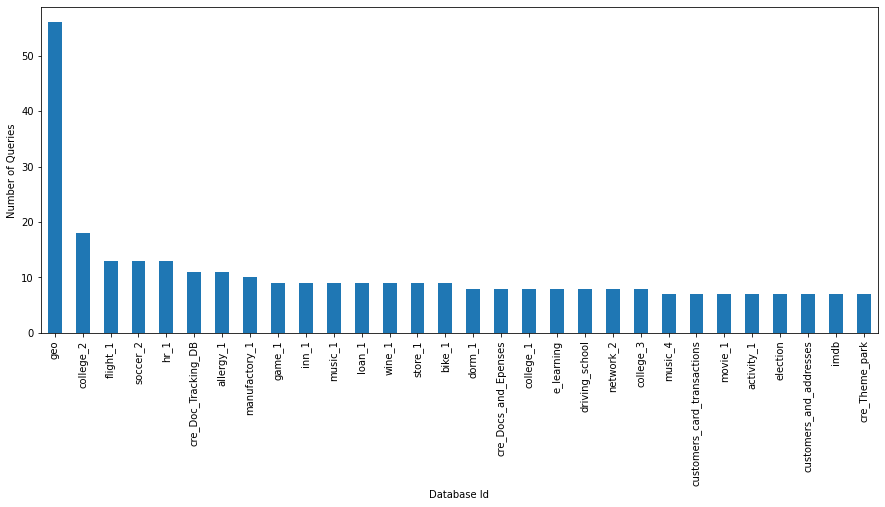

In [10]:
train.df_test["db_id"].value_counts()[:30].plot(
    kind="bar", figsize=(15, 6), xlabel="Database Id", ylabel="Number of Queries"
)

<AxesSubplot:xlabel='Database Id', ylabel='Number of Queries'>

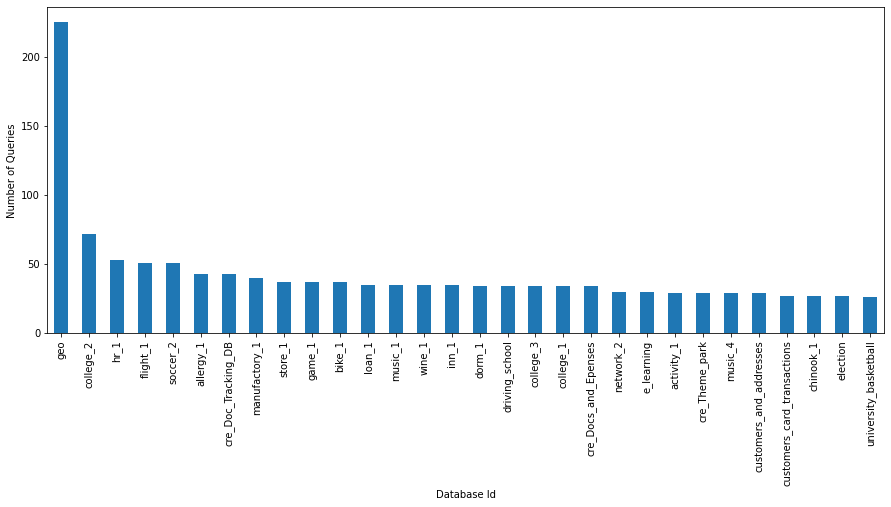

In [11]:
train.df_train["db_id"].value_counts()[:30].plot(
    kind="bar", figsize=(15, 6), xlabel="Database Id", ylabel="Number of Queries"
)

In [4]:
df = train.df_test

Sample Queries :

In [6]:
df["query"].value_counts()[:30]

SELECT traverse FROM river WHERE river_name  =  "ohio";                                                                                                                  4
SELECT city_name FROM city WHERE population  >  150000 AND state_name  =  "kansas";                                                                                      3
SELECT river_name FROM river WHERE traverse  =  "illinois";                                                                                                              3
SELECT COUNT ( river_name ) FROM river WHERE traverse  =  "idaho";                                                                                                       3
SELECT * FROM  departments WHERE department_name  =  'Marketing'                                                                                                         3
SELECT population FROM state WHERE state_name  =  "california";                                                                                  